<a href="https://colab.research.google.com/github/szm7/AML/blob/main/2348551_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In [ ]:
data = pd.read_csv("/content/program_5_dataset.csv")

In [ ]:
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
data.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            2
ALP           20
ALT            3
AST            2
BIL            0
CHE            0
CHOL          11
CREA           1
GGT            0
PROT           1
dtype: int64

In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

In [ ]:
fig = px.scatter(x=data['CREA'], y=data['PROT'])
fig.show()

***Simple Regression***

In [ ]:
x=data[['CREA']].values
y=data['PROT'].values
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
from sklearn.metrics import accuracy_score
ypred = model.predict(xtest)
print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

Intercept: 71.46642432416506
Coefficients: [0.00699256]


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
model1_MSE=mean_squared_error(ypred,ytest)
print("The mean sqaured error of the model is:",model1_MSE)

RS=r2_score(ytest,ypred)
print("The R Square value of the model is:",RS)

ypred_train = model.predict(xtrain)
MSE=mean_squared_error(ypred_train,ytrain)
print("The mean sqaured error of the model (Train) is:",MSE)

RS=r2_score(ytrain,ypred_train)
print("The R Square value of the model (Train) is:",RS)

The mean sqaured error of the model is: 29.43980527903969
The R Square value of the model is: -0.03641232667605543
The mean sqaured error of the model (Train) is: 27.911988556675055
The R Square value of the model (Train) is: 0.0012510516552118878


***Multiple*** ***Regression***

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Category_encoded'] = label_encoder.fit_transform(data['Category'])

In [ ]:
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_encoded
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0


In [ ]:
label_encoder = LabelEncoder()
data['Sex_encoded'] = label_encoder.fit_transform(data['Sex'])

In [ ]:
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_encoded,Sex_encoded
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,1
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,1
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,1
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,1
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,1


In [ ]:
data =data.drop(['Unnamed: 0','Category','Sex'],axis=1)

In [ ]:
data.head()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category_encoded,Sex_encoded
0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,1
1,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,1
2,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,1
3,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,1
4,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,1


In [ ]:
x1=data.drop(['Category_encoded', 'Age', 'Sex_encoded','PROT'],axis=1)
y1=data['PROT']

In [ ]:
x1

,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT
0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1
1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6
2,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2
3,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8
4,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9
...,...,...,...,...,...,...,...,...,...
608,34.0,46.4,15.0,150.0,8.0,6.26,3.98,56.0,49.7
609,39.0,51.3,19.6,285.8,40.0,5.77,4.51,136.1,101.1
610,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9
611,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.Series([variance_inflation_factor(x1.values,idx)
    for idx in range(x1.shape[1])],
    index=x1.columns)

print(vif)

ALB     31.162740
ALP     10.024253
ALT      3.184002
AST      2.938453
BIL      1.678633
CHE     22.397373
CHOL    27.238712
CREA     3.656226
GGT      2.542260
dtype: float64


In [ ]:
x1=data[['ALT','AST','BIL','CREA','GGT']]

In [ ]:
x1.head()

,ALT,AST,BIL,CREA,GGT
0,7.7,22.1,7.5,106.0,12.1
1,18.0,24.7,3.9,74.0,15.6
2,36.2,52.6,6.1,86.0,33.2
3,30.6,22.6,18.9,80.0,33.8
4,32.6,24.8,9.6,76.0,29.9


In [ ]:
x1train,x1test,y1train,y1test = train_test_split(x1,y1,test_size=0.20,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x1train,y1train)

LinearRegression()

In [ ]:
from sklearn.metrics import accuracy_score
y1pred = model1.predict(x1test)
print("Intercept:",model1.intercept_)
print("Coefficients:",model1.coef_)

Intercept: 72.31340128263405
Coefficients: [ 0.00396039 -0.00654952  0.01115328 -0.00344648 -0.00353636]


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
model2_MSE=mean_squared_error(y1pred,y1test)
print("The mean sqaured error of the model is:",model2_MSE)

RS=r2_score(y1test,y1pred)
print("The R Square value of the model is:",RS)

y1pred_train = model1.predict(x1train)
MSE=mean_squared_error(y1pred_train,y1train)
print("The mean sqaured error of the model (Train) is:",MSE)

RS=r2_score(y1train,y1pred_train)
print("The R Square value of the model (Train) is:",RS)

The mean sqaured error of the model is: 25.81199061190012
The R Square value of the model is: -0.033550781266673324
The mean sqaured error of the model (Train) is: 28.764418064898045
The R Square value of the model (Train) is: 0.004062254035987922


***Polynimial*** ***Regression***

In [ ]:
x2=data[['ALB']].values
y2=data['PROT'].values

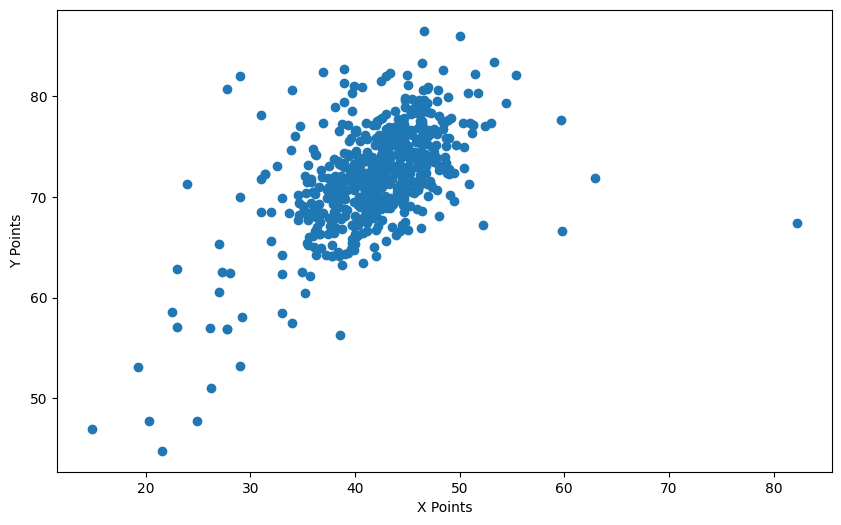

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel('X Points')
plt.ylabel('Y Points')
plt.scatter(x2,y2)
plt.show()

In [ ]:
x2train,x2test,y2train,y2test=train_test_split(x2, y2, test_size=0.20, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

p1=PolynomialFeatures(degree=2,include_bias=True)
xtrain_p1=p1.fit_transform(x2train)
xtest_p1=p1.fit_transform(x2test)

model2 = LinearRegression()
model2.fit(xtrain_p1, y2train)

y2pred = model2.predict(xtest_p1)

print('TEST DATA')
print('For degree  2')
r2 = r2_score(y2test, y2pred)
print(f'R-squared: {r2}')
model3_MSE = mean_squared_error(y2test, y2pred)
print(f'Mean Squared Error: {model3_MSE}')
mae = mean_absolute_error(y2test, y2pred)
print(f'Mean Absolute Error: {mae}')
print('--------------------------------')
ypred_train = model2.predict(xtrain_p1)
print('TRAIN DATA')
print('For degree  2')
r2 = r2_score(y2train, ypred_train)
print(f'R-squared: {r2}')
mse = mean_squared_error(y2train, ypred_train)
print(f'Mean Squared Error: {mse}')
mae = mean_absolute_error(y2train, ypred_train)
print(f'Mean Absolute Error: {mae}')

TEST DATA
For degree  2
R-squared: 0.19581091295952224
Mean Squared Error: 20.083890933197896
Mean Absolute Error: 3.4186092126604426
--------------------------------
TRAIN DATA
For degree  2
R-squared: 0.44129637027679336
Mean Squared Error: 16.136334670375096
Mean Absolute Error: 2.993360256517305


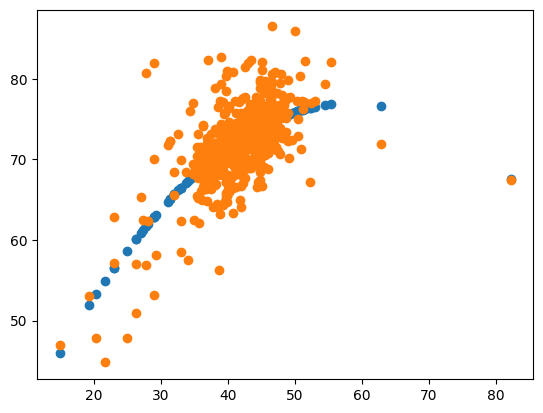

In [ ]:
plt.scatter(x2train,model2.predict(xtrain_p1))
plt.scatter(x2train,y2train)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures


p1=PolynomialFeatures(degree=5,include_bias=True)
xtrain_p1=p1.fit_transform(x2train)
xtest_p1=p1.fit_transform(x2test)

model2 = LinearRegression()
model2.fit(xtrain_p1, y2train)

y2pred = model2.predict(xtest_p1)

print('TEST DATA')
print('For degree  5')
r2 = r2_score(y2test, y2pred)
print(f'R-squared: {r2}')
mse = mean_squared_error(y2test, y2pred)
print(f'Mean Squared Error: {mse}')
mae = mean_absolute_error(y2test, y2pred)
print(f'Mean Absolute Error: {mae}')

print('--------------------------------')
ypred_train = model2.predict(xtrain_p1)
print('TRAIN DATA')
print('For degree  2')
r2 = r2_score(y2train, ypred_train)
print(f'R-squared: {r2}')
mse = mean_squared_error(y2train, ypred_train)
print(f'Mean Squared Error: {mse}')
mae = mean_absolute_error(y2train, ypred_train)
print(f'Mean Absolute Error: {mae}')

TEST DATA
For degree  5
R-squared: 0.20755096226640435
Mean Squared Error: 19.790693880875896
Mean Absolute Error: 3.4120965017532736
--------------------------------
TRAIN DATA
For degree  2
R-squared: 0.44320572845568773
Mean Squared Error: 16.081189078076864
Mean Absolute Error: 2.98778666452995


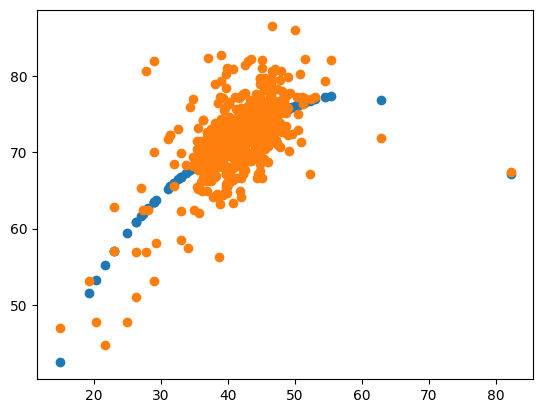

In [ ]:
plt.scatter(x2train,model2.predict(xtrain_p1))
plt.scatter(x2train,y2train)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures


p1=PolynomialFeatures(degree=7,include_bias=True)
xtrain_p1=p1.fit_transform(x2train)
xtest_p1=p1.fit_transform(x2test)

model2 = LinearRegression()
model2.fit(xtrain_p1, y2train)

y2pred = model2.predict(xtest_p1)

print('TEST DATA')
print('For degree  7')
r2 = r2_score(y2test, y2pred)
print(f'R-squared: {r2}')
mse = mean_squared_error(y2test, y2pred)
print(f'Mean Squared Error: {mse}')
mae = mean_absolute_error(y2test, y2pred)
print(f'Mean Absolute Error: {mae}')

print('--------------------------------')
ypred_train = model2.predict(xtrain_p1)
print('TRAIN DATA')
print('For degree  2')
r2 = r2_score(y2train, ypred_train)
print(f'R-squared: {r2}')
mse = mean_squared_error(y2train, ypred_train)
print(f'Mean Squared Error: {mse}')
mae = mean_absolute_error(y2train, ypred_train)
print(f'Mean Absolute Error: {mae}')

TEST DATA
For degree  7
R-squared: 0.2174103019209629
Mean Squared Error: 19.544465841368144
Mean Absolute Error: 3.454748147317185
--------------------------------
TRAIN DATA
For degree  2
R-squared: 0.45611515352263765
Mean Squared Error: 15.70834238047149
Mean Absolute Error: 2.9584918997857668


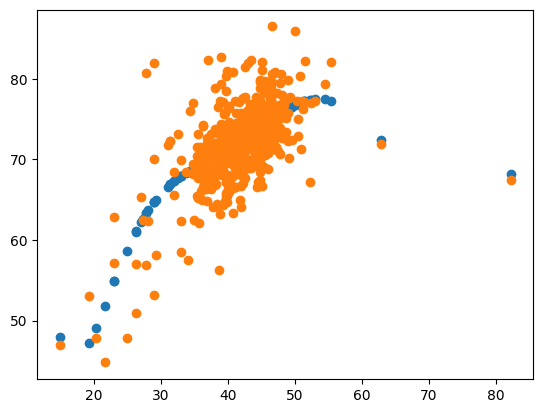

In [ ]:
plt.scatter(x2train,model2.predict(xtrain_p1))
plt.scatter(x2train,y2train)

***Ridge Regression***

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[0.001,0.01,1,5,10,20,30,35,40,45,50,55,100,150]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)

ridge_regressor.fit(x2,y2)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.001}
-19.976506370037338


In [ ]:
from sklearn.metrics import mean_squared_error
ypredR = ridge_regressor.predict(x2test)
ridge_MSE=mean_squared_error(ypredR,y2test)
print("The mean sqaured error of the model is:",ridge_MSE)
r2_val_test=ridge_regressor.score(x2train,y2train)
print("The R square of train is:",r2_val_test)
r2_val_train=ridge_regressor.score(x2test,y2test)
print("The R square of test is:",r2_val_train)


The mean sqaured error of the model is: 19.80963562847432
The R square of train is: -18.91319993331413
The R square of test is: -19.80963562847432


***Lasso Regression***

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[0.001,0.01,1,5,10,20,30,35,40,45,50,55,100,150]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x2,y2)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.33,random_state=2)


{'alpha': 0.001}
-19.976656197188476


In [ ]:
from sklearn.metrics import mean_squared_error
ypredRL = lasso_regressor.predict(x2test)
lasso_MSE=mean_squared_error(ypredRL,y2test)
print("The mean sqaured error of the model is:",ridge_MSE)
r2_val_test=lasso_regressor.score(x2train,y2train)
print("The R square of train is:",r2_val_test)
r2_val_train=lasso_regressor.score(x2test,y2test)
print("The R square of test is:",r2_val_train)


The mean sqaured error of the model is: 19.80963562847432
The R square of train is: -18.913257980266536
The R square of test is: -19.809403592133002


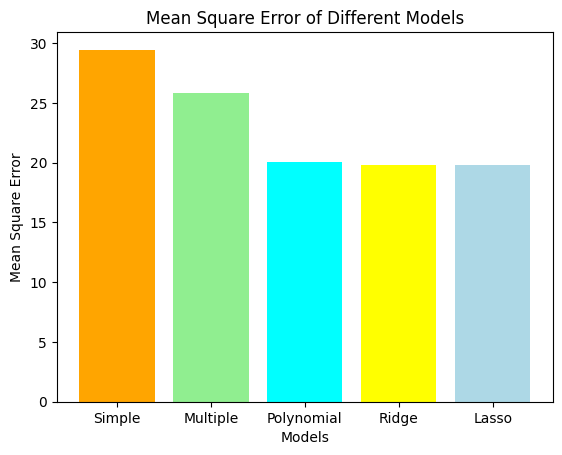

In [ ]:

model_names = ['Simple', 'Multiple', 'Polynomial','Ridge','Lasso']

mse_values = [model1_MSE, model2_MSE, model3_MSE,ridge_MSE,lasso_MSE]

plt.bar(model_names, mse_values, color=['orange', 'lightgreen', 'cyan','yellow','lightblue'])
plt.xlabel('Models')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error of Different Models')
plt.show()